In [620]:
import torch
import torch.nn as nn
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
import torchshow as ts
import torchmetrics

In [621]:
# Importere dataset, kun træning indtil videre.
training_images = MNIST(root='data', transform=ToTensor(), train=True)
training_dataloader = DataLoader(training_images, batch_size=1000)
# testing_images = MNIST(root='data', transform=ToTensor(), train=False)
# testing_dataloader = DataLoader(testing_images, batch_size=500)

In [622]:
# Laver det Neurale Netværk, og opstiller et accuracy objekt til at måle hvor god modellen er.
accuracy = torchmetrics.Accuracy(task="multiclass", num_classes=10)
net = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784,12),
    nn.ReLU(),
    nn.Linear(12,12),
    nn.ReLU(),
    nn.Linear(12,10)
)
# Bruger crossentropy til at udregne losset, og indstiller optimizeren.
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.01, maximize=False)

In [ ]:
# Loop'er over 10 epoker, og udregner loss'et og accuracy for hvert.
for i in range(10):
    total_loss = 0
    total_accuracy = 0
    size = len(training_dataloader)
    for images,labels in training_dataloader:
        optimizer.zero_grad()
        output = net(images)
        loss = loss_fn(output, labels)
        total_loss += loss
        loss.backward()
        optimizer.step()
        total_accuracy += accuracy(output, labels)
    avg_accuracy = total_accuracy / size
    print(f"Avg Accuracy: {((total_accuracy / size)*100):.2f}%")
    print(f"Avg Loss: {total_loss / size}")

Model output:
tensor([[ -4.2501, -29.3979,  -0.8760, -12.1050,  14.7614, -11.8239,   1.7023,
          -3.3504,   1.0904,   0.9045]], grad_fn=<AddmmBackward0>)
Efter softmax:
tensor([[5.5386e-09, 6.6353e-20, 1.6172e-07, 2.1483e-12, 1.0000e+00, 2.8456e-12,
         2.1306e-06, 1.3619e-08, 1.1555e-06, 9.5946e-07]],
       grad_fn=<SoftmaxBackward0>)
Modul bud:
tensor(4)


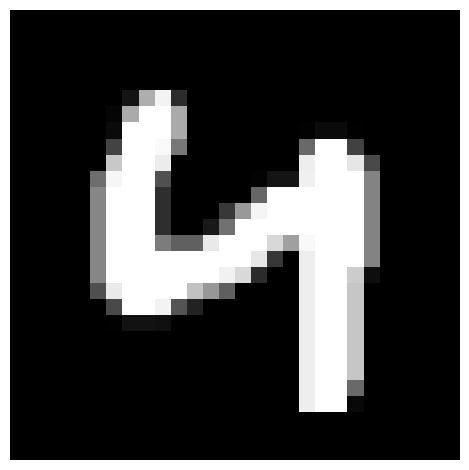

In [627]:
# Afprøver modellen på et givent index af billederne.
img_idx = 222
pred = net(training_images[img_idx][0])
print("Model output:")
print(pred)
sm = nn.Softmax(dim=1)
print("Efter softmax:")
print(sm(pred))
print("Modul bud:")
print(pred.argmax())
ts.show(training_images[img_idx][0])